# Kalman filter idea

In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../latent_analysis/'))
sys.path.append(os.path.abspath('../../Neural_Decoding/'))
from Neural_Decoding.decoders import KalmanFilterDecoder
import LTransform as LT
from get_utils import get_hidden, get_force, get_vel
#Import metrics
from Neural_Decoding.metrics import get_R2
from Neural_Decoding.metrics import get_rho
import matplotlib.pyplot as plt
import numpy as np

from kalman_utils import pred_state,find_M2

In [40]:
folder_name = 'Sim_all_inv'
n_latent = 50
ff_coef = [0,8,0,8]
phase = {'NF1':[0],'FF1':[8],'NF2':[0],'FF2':[8]}
labels = ['NF1','FF1','NF2','FF2']
#ff_coef = [0,0]
#phase = {'NF1':[0],'NF2':[0]}
#labels = ['NF1','NF2']

mn = 0
model_name = "model{:02d}".format(mn)

hidden = get_hidden(folder_name,model_name,phase,ff_coef,demean=False)
force = get_force(folder_name,model_name,phase,ff_coef)

In [41]:
# run FA on hidden
T = LT.Transform(num_latent=n_latent)
all_hidden = np.concatenate(hidden,axis=0)
T.fit(all_hidden,method='FA')
#z = T.transform(hidden[0],ensure_orthogonality=False)
#z = hidden[0]

In [42]:
hidden_nf = [hidden[0],hidden[2]]
hidden_nf = np.concatenate(hidden_nf,axis=0)

force_nf = [force[0],force[2]]
force_nf = np.concatenate(force_nf,axis=0)

z = T.transform(hidden_nf,ensure_orthogonality=False)

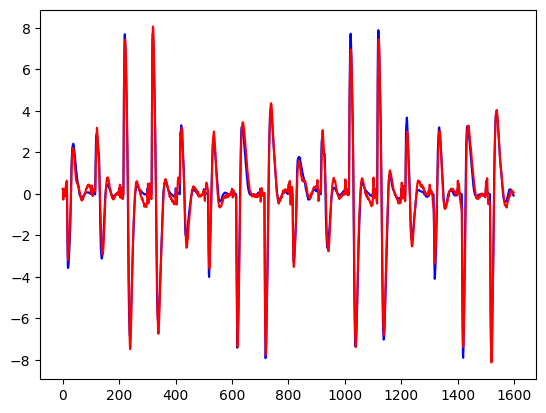

In [43]:
dims = z.shape
neural_data = z.reshape(-1,dims[-1])
force_data = force_nf.reshape(dims[0]*dims[1],-1)

#Z-score inputs 
neural_data_mean = np.nanmean(neural_data,axis=0)
neural_data_std = np.nanstd(neural_data,axis=0)
neural_data_z = (neural_data - neural_data_mean)/neural_data_std

#Zero-center outputs
force_data_mean = np.nanmean(force_data,axis=0)
force_data_z = (force_data - force_data_mean)

model_kf=KalmanFilterDecoder(C=1) 
model_kf.fit(neural_data_z,force_data_z)
force_data_pred, K_all = model_kf.predict(neural_data_z,force_data_z)

fig_x_kf=plt.figure()
i = 1
plt.plot(force_data_z[:,i]+force_data_mean[i],'b')
plt.plot(force_data_pred[:,i]+force_data_mean[i],'r')

In [52]:
K = K_all[10] # K has been stablized after 10 iterations
A,W,H,Q= model_kf.model

M1 = A-K*H*A
M2_A = K

In [53]:
states = pred_state(force_data_z,neural_data_z,M1,M2_A)

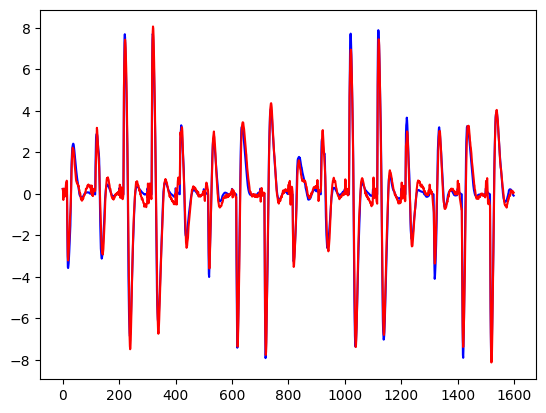

In [54]:
fig_x_kf=plt.figure()

i = 1

plt.plot(force_data_z[:,i]+force_data_mean[i],'b')
plt.plot(states[:,i]+force_data_mean[i],'r')

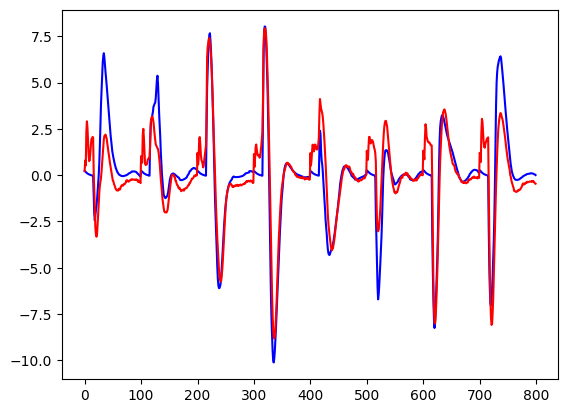

In [56]:
from kalman_utils import pred_state

#n_nf2 = hidden[2]
j=1
n_nf2 = T.transform(hidden[j],ensure_orthogonality=False)

f_nf2 = force[j]

dims = n_nf2.shape
n_nf2 = n_nf2.reshape(-1,dims[-1])
f_nf2 = f_nf2.reshape(dims[0]*dims[1],-1)

n_nf2_mean = np.nanmean(n_nf2,axis=0)
n_nf2_std = np.nanstd(n_nf2,axis=0)
n_nf2_z = (n_nf2 - n_nf2_mean)/n_nf2_std

f_nf2_mean = np.nanmean(f_nf2,axis=0)
f_nf2_z = (f_nf2 - f_nf2_mean)
states = pred_state(f_nf2_z,n_nf2_z,M1,M2_A)


fig_x_kf=plt.figure()
i = 1
plt.plot(f_nf2_z[:,i]+f_nf2_mean[i],'b')
plt.plot(states[:,i]+f_nf2_mean[i],'r')

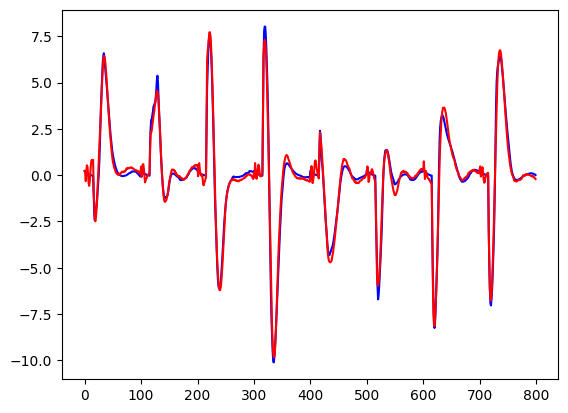

In [57]:
M2_B = find_M2(f_nf2_z,n_nf2_z,M1)
states = pred_state(f_nf2_z,n_nf2_z,M1,M2_B)


fig_x_kf=plt.figure()
i = 1
plt.plot(f_nf2_z[:,i]+f_nf2_mean[i],'b')
plt.plot(states[:,i]+f_nf2_mean[i],'r')

In [18]:
# now i have M2_A and M2_B
# does M2 and M2_B overlap

(2, 40)

In [62]:
dims = z.shape

neural_data_z = neural_data_z.reshape(dims[0],dims[1],-1)
nf1 = neural_data_z[:8,:,:]
nf2 = neural_data_z[8:,:,:]

In [91]:
np.linalg.norm(delta.reshape(-1,dims[-1])@N,axis=1)/48

array([0.15394726, 0.16709892, 0.18336369, 0.15641343, 0.13597167,
       0.12274505, 0.114454  , 0.10960947, 0.11391071, 0.11469415,
       0.10959346, 0.10195017, 0.09198621, 0.08697578, 0.08798905,
       0.09299959, 0.09839627, 0.05626976, 0.04990143, 0.05234813,
       0.05963329, 0.0676848 , 0.07608119, 0.08446676, 0.08663693,
       0.08472842, 0.07879987, 0.07345935, 0.07131852, 0.06909116,
       0.06414408, 0.06010622, 0.05878341, 0.05953249, 0.05788533,
       0.06178884, 0.0570056 , 0.05915903, 0.06023208, 0.05823501,
       0.05670159, 0.05420618, 0.05110396, 0.05028044, 0.05006962,
       0.04534739, 0.04559808, 0.04692034, 0.04933866, 0.05303317,
       0.05402565, 0.05601982, 0.05643272, 0.05763115, 0.05846499,
       0.05914593, 0.06065426, 0.06023678, 0.06097824, 0.0608184 ,
       0.06000272, 0.06038813, 0.05904395, 0.05540225, 0.05419238,
       0.0556929 , 0.0542868 , 0.0531978 , 0.05283222, 0.05066962,
       0.04952545, 0.05335206, 0.05218464, 0.05476738, 0.05156

In [92]:
np.linalg.norm(delta.reshape(-1,dims[-1])@P,axis=1)/2

array([0.14588367, 0.19576106, 0.19227149, 0.08303347, 0.10175604,
       0.09904382, 0.09500323, 0.08414875, 0.12223108, 0.11596021,
       0.13736065, 0.14347488, 0.1088787 , 0.08578873, 0.10679059,
       0.13084675, 0.08144293, 0.05688693, 0.06350365, 0.08050769,
       0.09451301, 0.10679002, 0.082836  , 0.0718791 , 0.11790551,
       0.10823577, 0.10514765, 0.07325246, 0.07047018, 0.1152717 ,
       0.14334424, 0.15682085, 0.12725808, 0.17263608, 0.17457041,
       0.218629  , 0.17445536, 0.14811771, 0.1581696 , 0.13938927,
       0.13975856, 0.13545409, 0.09711498, 0.0779506 , 0.11158557,
       0.09688218, 0.07778883, 0.06927335, 0.05963595, 0.05719667,
       0.04413989, 0.0248703 , 0.04182639, 0.04816948, 0.05265991,
       0.08517787, 0.069159  , 0.10937248, 0.10511269, 0.10067418,
       0.15083466, 0.11518361, 0.09923919, 0.11592461, 0.12361623,
       0.13667085, 0.09007081, 0.09019639, 0.07246193, 0.03867838,
       0.03323301, 0.05072261, 0.01141167, 0.02989841, 0.03272

In [89]:
delta = nf2-nf1 # must happen mostly on the null of M2_A


In [90]:
U, S, Vh = np.linalg.svd(M2_A, full_matrices=True)
V = Vh.T
P = V[:,:2] # output potent
N = V[:,2:] # output null

In [67]:
P.shape

(50, 2)